In [3]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten, Conv2D, MaxPooling2D
from tensorflow.keras.callbacks import TensorBoard
import pickle
import time
from sklearn.model_selection import train_test_split

name = f"cats-vs-dog-with-tensorboard-{int(time.time())}"

tensorboard = TensorBoard(log_dir=f'gvclogs/{name}.')

X = np.array(pickle.load(open("X.pickle", "rb")))
y = np.array(pickle.load(open("y.pickle", "rb")))

X = X/255.0

model = Sequential()

model.add(Conv2D(64, (5, 5), strides=(1, 1), activation='relu', input_shape = X.shape[1:]))
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))

model.add(Conv2D(64, (5, 5), strides=(2, 2), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.25))

model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy',
             optimizer='adam',
             metrics=['accuracy'])

#x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.1)

model.fit(X, y, batch_size=32, epochs=10, validation_split=0.1, callbacks=[tensorboard])

Epoch 1/10
702/702 [==============================] - 48s 68ms/step - loss: 0.6408 - accuracy: 0.6274 - val_loss: 0.5853 - val_accuracy: 0.6946
Epoch 2/10
702/702 [==============================] - 47s 67ms/step - loss: 0.5519 - accuracy: 0.7201 - val_loss: 0.5559 - val_accuracy: 0.7090
Epoch 3/10
702/702 [==============================] - 47s 67ms/step - loss: 0.5022 - accuracy: 0.7545 - val_loss: 0.5178 - val_accuracy: 0.7443
Epoch 4/10
702/702 [==============================] - 47s 67ms/step - loss: 0.4642 - accuracy: 0.7789 - val_loss: 0.5062 - val_accuracy: 0.7547
Epoch 5/10
702/702 [==============================] - 47s 67ms/step - loss: 0.4259 - accuracy: 0.8004 - val_loss: 0.4852 - val_accuracy: 0.7651
Epoch 6/10
702/702 [==============================] - 47s 67ms/step - loss: 0.3894 - accuracy: 0.8200 - val_loss: 0.4867 - val_accuracy: 0.7695
Epoch 7/10
702/702 [==============================] - 47s 67ms/step - loss: 0.3590 - accuracy: 0.8386 - val_loss: 0.4954 - val_accuracy:

In [12]:
model.save('CatsvDogs')

Instructions for updating:
If using Keras pass *_constraint arguments to layers.
INFO:tensorflow:Assets written to: CatsvDogs/assets


In [14]:
prediction = model.predict([X[:-1]])

In [15]:
print(prediction)

[[0.0106433 ]
 [0.24636489]
 [0.05652991]
 ...
 [0.6447019 ]
 [0.97428083]
 [0.9062601 ]]


<function matplotlib.pyplot.show(*args, **kw)>

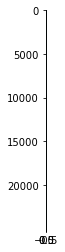

In [16]:
import matplotlib.pyplot as plt

plt.imshow(prediction)
plt.show

In [17]:
print(np.argmax(prediction))

3877
